In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
books_data = pd.read_csv('bestsellers with categories.csv')

In [4]:
books_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
books_data.shape

(550, 7)

In [6]:
books_data = books_data.drop_duplicates(subset='Name')

In [7]:
books_data.shape

(351, 7)

In [8]:
books_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

In [9]:
books_data.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

In [10]:
books_data_nans = books_data.isna().sum()
books_data_nans

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [11]:
unique_genres = books_data["genre"].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

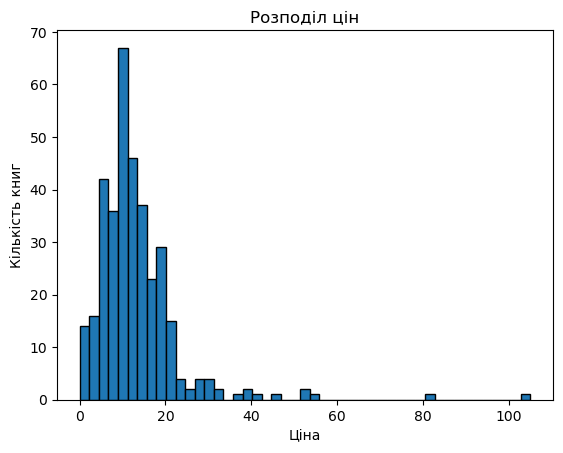

In [12]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
books_data['price'] = pd.to_numeric(books_data['price'], errors='coerce')
books_data['price'].plot(kind='hist', bins='fd', edgecolor='black' )
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

In [13]:
price_stats = books_data['price'].agg(['max', 'min', 'mean', 'median'])
price_stats

max       105.000000
min         0.000000
mean       13.076923
median     12.000000
Name: price, dtype: float64

# Первинне дослідження даних (Summary)

In [14]:
print(f'Чи є в якихось змінних пропуски? Відповідь: {"Так" if books_data_nans.sum() !=0 else "Ні"}')
print(f'Які є унікальні жанри?  Відповідь:  {", ".join(unique_genres)}')
print(f'Максимальна ціна? Відповідь: {price_stats[0]}')
print(f'Мінімальна ціна? Відповідь: {price_stats[1]}')
print(f'Середня ціна? Відповідь: {price_stats[2].round(3)}')
print(f'Медіанна ціна? Відповідь: {price_stats[3]}')


Чи є в якихось змінних пропуски? Відповідь: Ні
Які є унікальні жанри?  Відповідь:  Non Fiction, Fiction
Максимальна ціна? Відповідь: 105.0
Мінімальна ціна? Відповідь: 0.0
Середня ціна? Відповідь: 13.077
Медіанна ціна? Відповідь: 12.0


# Пошук та сортування даних

In [15]:
# Який рейтинг у датасеті найвищий?
max_rating = books_data['user_rating'].max()
max_rating

4.9

In [16]:
# Скільки книг мають такий рейтинг?
books_max_rating = (books_data[books_data['user_rating'] == max_rating])
books_max_rating_count = len(books_max_rating)
books_max_rating_count

28

In [17]:
# Яка книга має найбільше відгуків?
max_reviews = books_data['reviews'].max()
book_with_max_reviews = books_data[books_data['reviews']==max_reviews]
book_with_max_reviews

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [18]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
year = 2015
top_50_year = books_data[books_data['year'] == year].head(50)
max_price = top_50_year['price'].max()
book_with_max_price_year = top_50_year[top_50_year['price'] == max_price]
book_with_max_price_year

,name,author,user_rating,reviews,price,year,genre
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [19]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
year = 2010
genre = 'Fiction'
genre_in_year = books_data[(books_data['year'] == year) & (books_data['genre']== genre)]
genre_in_year_count = len(genre_in_year)
genre_in_year_count

17

In [20]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
years = [2010, 2011]
rating = 4.9
books_with_rating_in_years = books_data[(books_data['user_rating'] == float(rating)) & (books_data['year'].isin(years))]
books_with_rating_in_years_count = len(books_with_rating_in_years)
books_with_rating_in_years_count

1

In [21]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
year = 2015
max_price = 8
books_with_max_cost_in_year = books_data[(books_data['year']==year) & (books_data['price'] < max_price)].sort_values(by='price', ascending=True)
books_with_max_cost_in_year.head()

,name,author,user_rating,reviews,price,year,genre
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


In [22]:
#  Яка книга остання у відсортованому списку?
books_with_max_cost_in_year[-1:]

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


# Пошук та сортування даних (Summary)

In [23]:
print(f'Який рейтинг у датасеті найвищий? Відповідь: {max_rating}')
print(f'Скільки книг мають такий рейтинг? Відповідь: {books_max_rating_count}')
print(f'Яка книга має найбільше відгуків? Відповідь: {book_with_max_reviews["name"].iloc[0]}')
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {book_with_max_price_year["name"].iloc[0]}')
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {genre_in_year_count}')
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {books_with_rating_in_years_count}')
print(f'Яка книга остання у відсортованому списку? Відповідь: {books_with_max_cost_in_year[-1:]["name"].iloc[0]}')

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 28
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Go Set a Watchman: A Novel
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 17
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)
